# Data Science Nigeria 
## Introduction to ML and Deep Learning Course
### Study Guide Practice Notebook

# Week 3 - Practice

In [21]:
#Import datasets
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Text(0,0.5,'count')

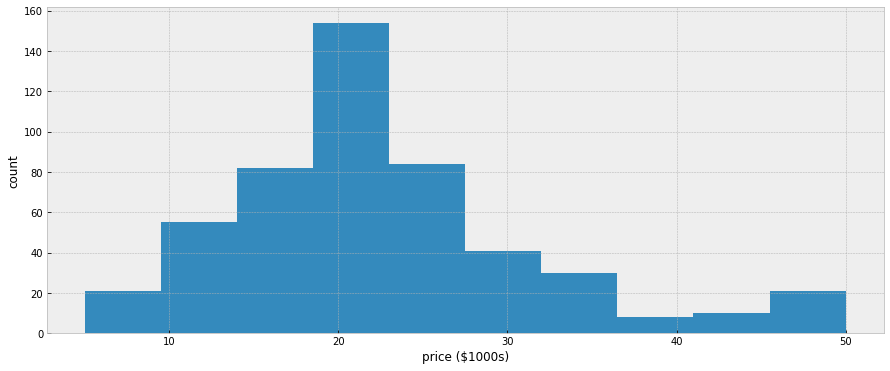

In [22]:
#Print a histogram of the quantity to predict: price
%matplotlib inline
plt.style.use('bmh') 
data = load_boston()
plt.figure(figsize=(15, 6)) 
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')

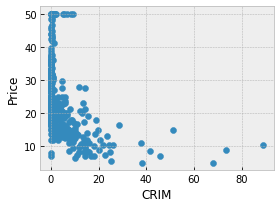

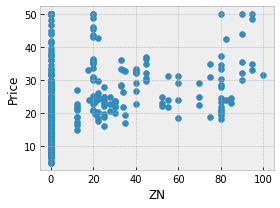

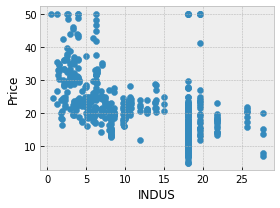

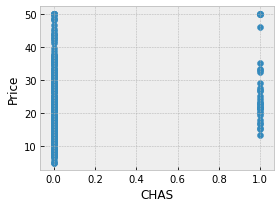

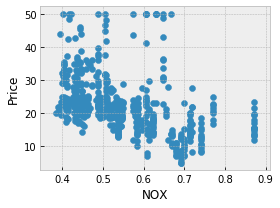

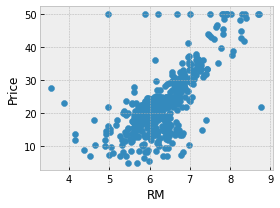

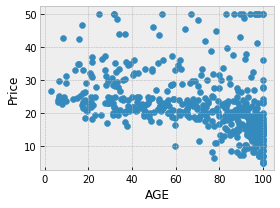

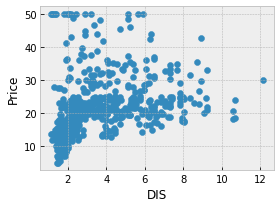

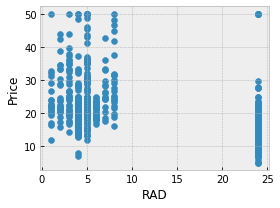

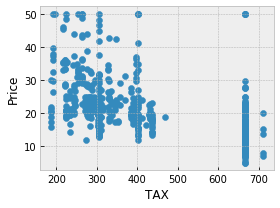

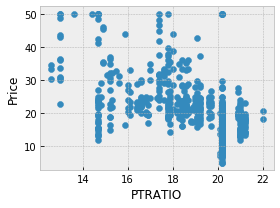

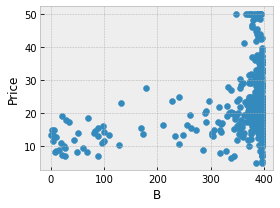

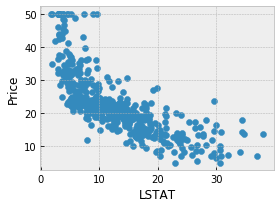

In [23]:
#Print the join histogram for each feature:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3)) 
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12) 
    plt.tight_layout()

In [24]:
#Predict using datasets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target) 
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

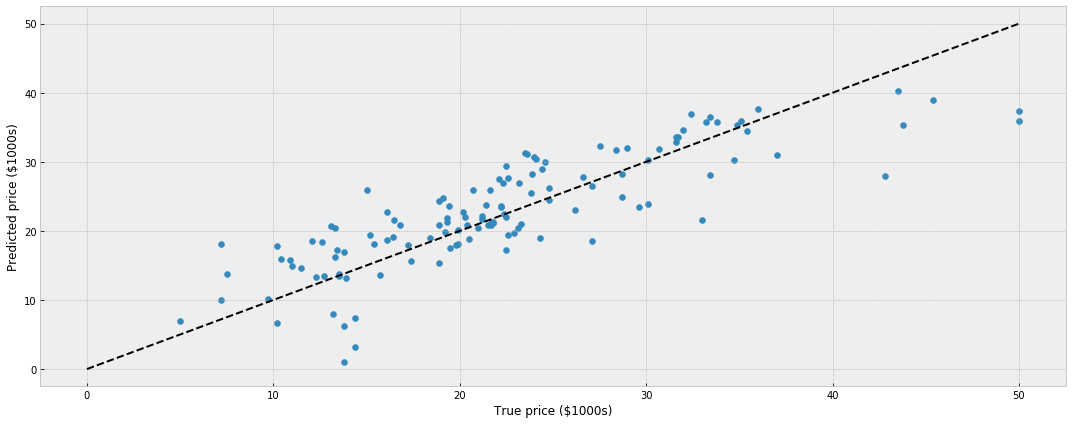

In [25]:
#Plot the linear regression
plt.figure(figsize=(15, 6))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()